# LINEAR REGRESSION (1 feature)

In [1]:
# import standard packages

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### `1) Read data`

In [2]:
# link to data

<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing" target="_blank">Click here</a>

In [3]:
# data features information

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollars
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000's dollars

In [4]:
# read data from url

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", #link
                     sep="\s+", #separator
                     usecols=[5,13], #features to be used
                     names=["RM", "MEDV"]) #assign name to the features

### `2) Data Esploration`

In [5]:
# head of dataframe

boston.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [16]:
# dataframe dimensions

boston.shape

(506, 2)

In [17]:
# dataframe infos

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   MEDV    506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


In [18]:
# dataframe numeric description

boston.describe()

,RM,MEDV
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


In [19]:
# extraxt features column 

X = boston.drop("MEDV", axis=1).values

In [20]:
# extraxt target column

Y = boston["MEDV"].values

Text(0.5, 1.0, 'House value vs number of rooms')

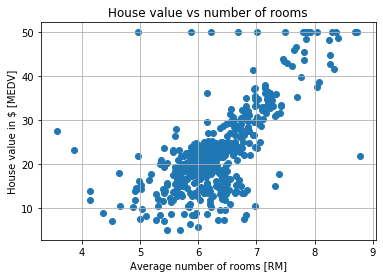

In [22]:
# plot data using matplotlib scripting layer

plt.figure()
plt.scatter(X, Y)
plt.grid()
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("House value in $ [MEDV]")
plt.title("House value vs number of rooms")

### `3) Model creation`

In [23]:
# divide data into trainign and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 

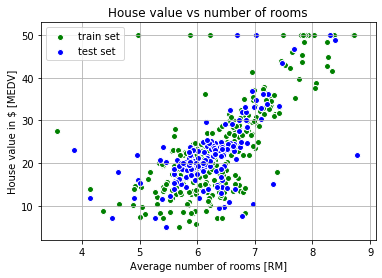

In [25]:
# plot train and test data 

plt.figure()
plt.scatter(X_train, Y_train, c="green", edgecolor="white", label="train set")
plt.scatter(X_test, Y_test, c="blue", edgecolor="white", label="test set")
plt.grid()
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("House value in $ [MEDV]")
plt.title("House value vs number of rooms")
plt.legend()

In [26]:
# train linear regression model

from sklearn.linear_model import LinearRegression

ll = LinearRegression()
ll.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# linear regression parameters

intercept = ll.intercept_
slope = ll.coef_
print("Linear regression parameters: \n intercept= %.2f \n slope= %.2f" % (intercept, slope))

Linear regression parameters: 
 intercept= -39.45 
 slope= 9.86


In [39]:
# make predictions

Y_pred = ll.predict(X_test)
Y_pred

array([23.98250805, 20.59221867, 20.8090395 , 17.8425363 , 15.87143782,
       22.78999347, 26.41681466, 31.86690195, 22.05083154, 21.28210314,
       22.100109  , 18.59155372, 20.63164064, 26.08172792, 24.041641  ,
       16.85698706, -1.37567384, 17.61585997, 23.79525369, 26.86031182,
       33.68031254, 20.6809181 , 16.21638005, 16.77814312, 19.18288326,
       13.39770923, 19.80377928, 27.39250841, 22.37606279, 25.94375103,
       22.98710332, 24.19932888, 23.45031146, 21.9719876 , 29.77753756,
       15.67432797, 17.13294084, 24.4358607 ,  6.16377783, 23.55872187,
       22.54360616, 16.65987721, 21.29195863, 24.15005142, 27.98383795,
       12.55999238, 28.17109231, 23.04623627, 22.30707434,  9.5639227 ,
       21.30181412, 19.87276773, 23.77554271, 21.1934037 , 25.05675672,
       18.42401035, 15.73346093, 25.63823077, 16.85698706, 47.08378217,
       21.10470427, 19.35042663, 15.68418347, 26.85045633, 18.82808553,
       24.85964687, 18.47328781,  8.87403823, 28.10210386, 19.02

### `4) Model evaluation`

In [43]:
# calculate mse for the linear regression model

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print("mean squared error: \n mse = %.2f" % (mse))

mean squared error: 
 mse = 44.56


In [45]:
# calculate R^2 for the linear regression model

from sklearn.metrics import r2_score

r2 = r2_score(Y_test, Y_pred)
print("r^2 score: \n r^2 = %.2f" % (r2))

r^2 score: 
 r^2 = 0.32


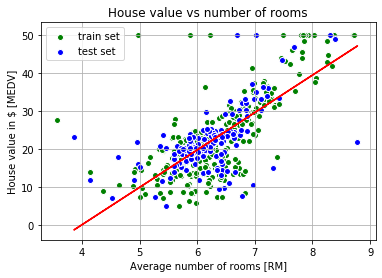

In [46]:
# plot regression line

plt.figure()
plt.scatter(X_train, Y_train, c="green", edgecolor="white", label="train set")
plt.scatter(X_test, Y_test, c="blue", edgecolor="white", label="test set")
plt.plot(X_test, Y_pred, c="red")
plt.grid()
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("House value in $ [MEDV]")
plt.title("House value vs number of rooms")
plt.legend()